#Sample code for binary classification

Load libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Read data

In [0]:
# read the breast cancer wisconsin dataset
dataset = load_breast_cancer()

In [0]:
#30 features
dataset['data'].shape

(569, 30)

In [0]:
#binary target
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:
dataset['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [0]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

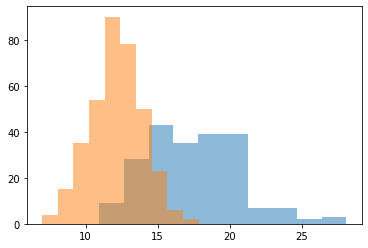

In [0]:
# show data
plt.hist(dataset['data'][:, 0][dataset['target']==0], label=dataset['target_names'][0], alpha=0.5)
plt.hist(dataset['data'][:, 0][dataset['target']==1], label=dataset['target_names'][1], alpha=0.5)
plt.show()

In [0]:
# image(numpy.ndarray)
X = dataset.data

# label(numpy.ndarray)
y = dataset.target

In [0]:
#split dataset to train and test dataset
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)#default is True

In [0]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

455 114
455 114


###Train model

In [0]:
model = DecisionTreeClassifier()

In [0]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

###Evaluation

k-th cross validation

In [0]:
#k-th cross validation
cv = 3 #the number of foldings
cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

array([0.94736842, 0.90789474, 0.94039735])

confusion matrix

In [0]:
#calculate confusion matrix
y_train_pred = cross_val_predict(model, X_train, y_train, cv=cv)
conf_mx = confusion_matrix(y_train, y_train_pred)

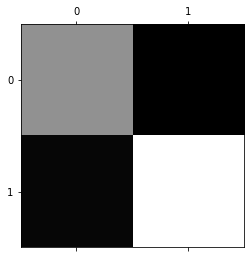

In [0]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

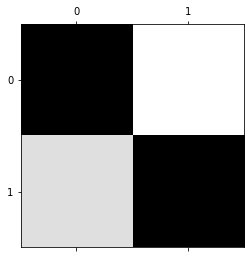

In [0]:
#convert to error probability
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
#set diagonal to 0 for visibility
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

various scores

In [0]:
accuracy_score(y_train, y_train_pred)

0.9296703296703297

In [0]:
precision_score(y_train, y_train_pred)

0.953405017921147

In [0]:
recall_score(y_train, y_train_pred)

0.9333333333333333

In [0]:
f1_score(y_train, y_train_pred)

0.9432624113475178

In [0]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       170
           1       0.95      0.93      0.94       285

    accuracy                           0.93       455
   macro avg       0.92      0.93      0.93       455
weighted avg       0.93      0.93      0.93       455



In [0]:
y_train_probas = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')

In [0]:
y_train_scores = y_train_probas[:, 1]

In [0]:
def plot_pr_curve(y, y_score, label=None):

    fpr, tpr, thresholds = precision_recall_curve(y, y_score)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [1, 0], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    return

No handles with labels found to put in legend.


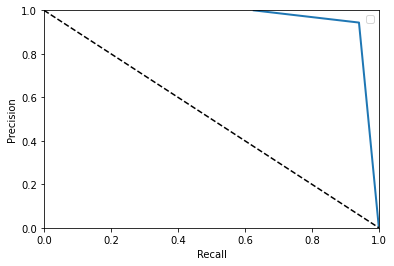

In [0]:
plot_pr_curve(y_train, y_train_scores)
plt.show()

In [0]:
def plot_roc_curve(y, y_score, label=None):

    fpr, tpr, thresholds = roc_curve(y, y_score)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    return

No handles with labels found to put in legend.


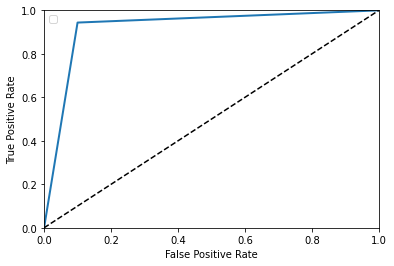

In [0]:
plot_roc_curve(y_train, y_train_scores)
plt.show()

In [0]:
roc_auc_score(y_train, y_train_scores)

0.9219298245614035

###Test

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
accuracy_score(y_test, y_test_pred)

0.9385964912280702

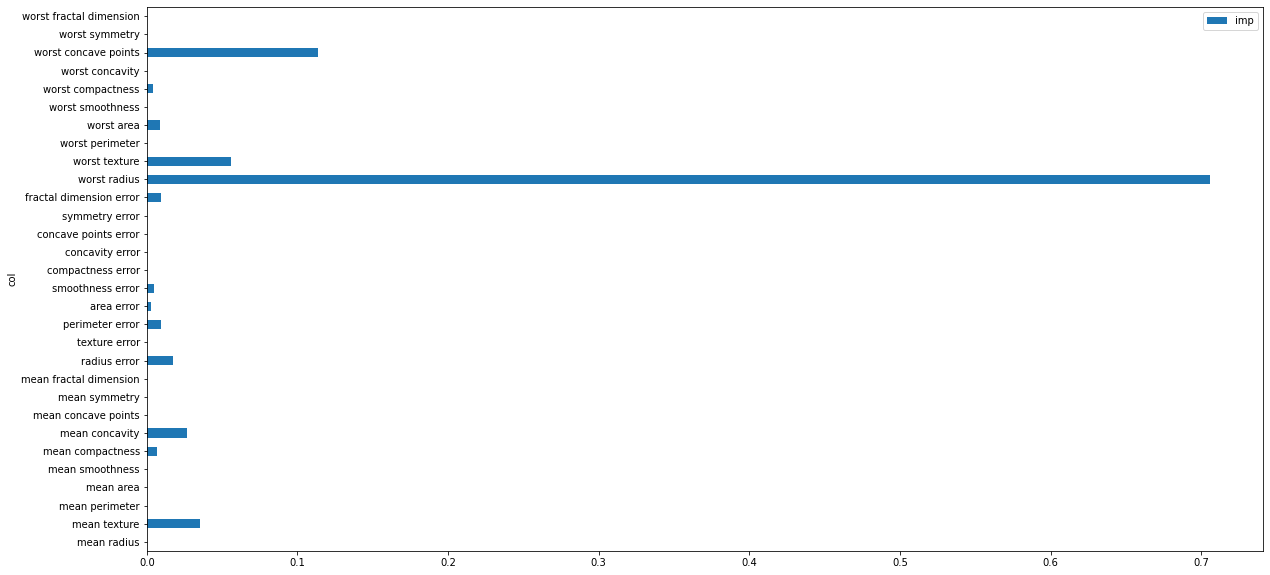

In [0]:
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': dataset['feature_names']})
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))

###Save

In [0]:
#save the prediction
submissiondir = '.'
submissionname = 'submission'
pd.DataFrame(data={'target':y_test, 'prediction':y_test_pred}).to_csv(submissiondir + '/' + submissionname + ".csv", index_label=["Id"])

In [0]:
# save the model
filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']

In [0]:
# load the model
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9385964912280702
